In [4]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

In [5]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [6]:
X = X[y != 2]
y= y[y != 2]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(x_train, y_train)
y_pred = linear_svm.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [9]:
def plot_decision_boundary( X, y,model, title):
  plt.figure(figsize=(8,6))

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

  z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  z = z.reshape(xx.shape)

  plt.contourf(xx, yy, z, alpha=0.3)
  plt.scatter(X[:,0], X[:,1], c=y,s=40,edgecolors='k')
  plt.title(title)
  plt.xlabel('Sepal Length')
  plt.ylabel('Sepal Width')
  plt.show()

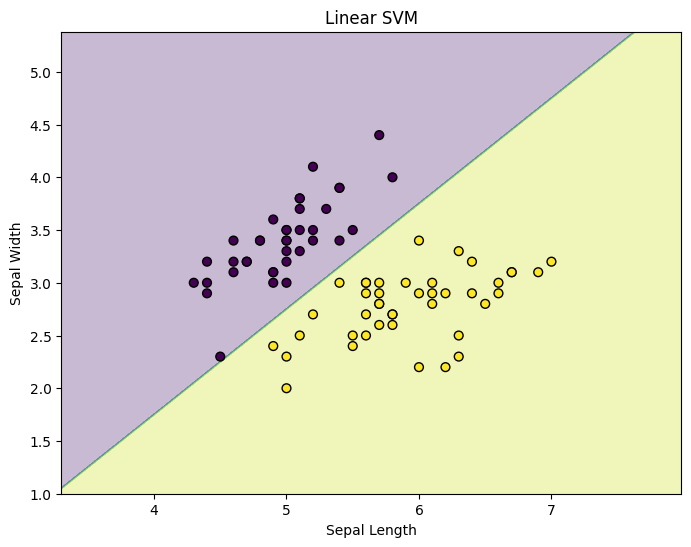

In [10]:
plot_decision_boundary(x_train, y_train, linear_svm, 'Linear SVM')

In [12]:
rbf_svm = SVC(kernel='rbf', C=1.0, gamma=0.7)
rbf_svm.fit(x_train, y_train)
y_pred_rbf = rbf_svm.predict(x_test)

print("RBf SVM")
print(classification_report(y_test, y_pred_rbf))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_rbf))

RBf SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix
[[12  0]
 [ 0  8]]


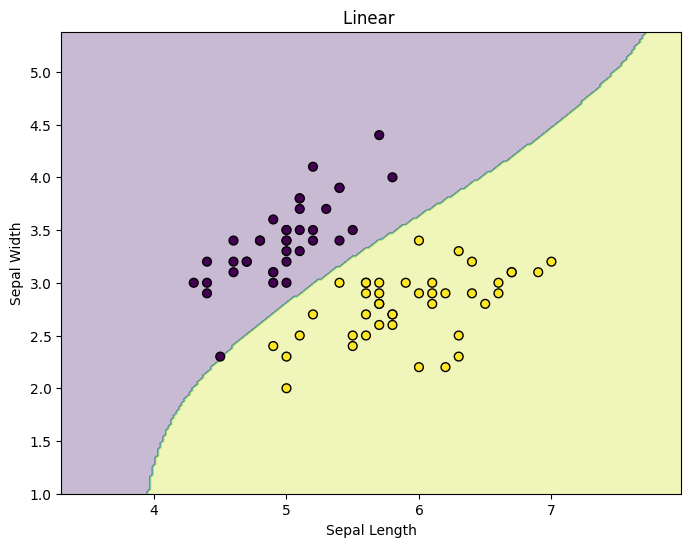

In [13]:
plot_decision_boundary(x_train, y_train, rbf_svm,"Linear ")